In [2]:
import random
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import glob

sns.set(color_codes=True)
%matplotlib inline 

In [3]:
seed = 42
random.seed(seed)

### Functions Definitions

In [4]:
def my_show_df_shape(df):
    print("Number of examples/rows: {:,}".format(df.shape[0]))
    print("Number of features: {:,}".format(df.shape[1]))

In [5]:
def my_show_df_NaNs(df):
    nan_count = df.isna().sum()
    # nan_count = nan_count[nan_count > 0]
    nan_percentage = df.isna().mean() * 100
    # nan_percentage = nan_percentage[nan_percentage > 0]
    if nan_count.empty:
        print("No NaN values found in the dataset.")
    else:
        print("Number of examples/rows:", df.shape[0])
        print("Number of features:", df.shape[1])
        print("Features with NaNs:")
        for i in range(len(nan_count)):
            feature = nan_count.index[i]
            if nan_count[feature] > 0:
                print(f"{feature:<30} {nan_count[feature]:<10} {nan_percentage[feature]:<8.4f}%")
            else:
                print(f"{feature:<30} no NaNs")

### Dataset Load

In [6]:
filenames = glob.glob('../dataset/*.csv')
p = 1  # 10% of the lines - Around xxxx rows
# p = 0.0025  # 0,25% of the lines - Around xxxx rows
dfs = []
for file in filenames:
    df = pd.read_csv(file, header=0, sep=',', skiprows=lambda i: i>0 and random.random() > p)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

C:\Users\ruben\AppData\Local\Temp\ipykernel_12444\4235832817.py:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, header=0, sep=',', skiprows=lambda i: i>0 and random.random() > p)
C:\Users\ruben\AppData\Local\Temp\ipykernel_12444\4235832817.py:6: DtypeWarning: Columns (23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, header=0, sep=',', skiprows=lambda i: i>0 and random.random() > p)
C:\Users\ruben\AppData\Local\Temp\ipykernel_12444\4235832817.py:6: DtypeWarning: Columns (9,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, header=0, sep=',', skiprows=lambda i: i>0 and random.random() > p)
C:\Users\ruben\AppData\Local\Temp\ipykernel_12444\4235832817.py:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, header=0, 

In [7]:
df = df

### Initial Exploration

In [8]:
df

,Date flow start,Date flow end,Src IPv4,sPort,Dst IPv4,dPort,SYN size,TCP win,TCP SYN TTL,TLS SNI,...,HTTP UA OS MAJ,HTTP UA OS MIN,HTTP UA OS BLD,SSH Client Version,SSH Client Application,SSH Client Encryption,SSH Client MAC,SSH Client Compression,Session ID,Ground Truth OS
0,2019-07-11 23:58:57.823,2019-07-11 23:58:57.823,151.27.76.70,34377.0,75.252.41.68,14349.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3029,Windows
1,2019-07-11 23:58:08.780,2019-07-11 23:58:57.810,151.27.76.108,40664.0,179.22.75.154,443.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2120,Android
2,2019-07-11 23:59:00.339,2019-07-11 23:59:00.371,151.27.72.114,64630.0,179.22.74.153,443.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59834,Mac OS
3,2019-07-11 23:58:58.308,2019-07-11 23:58:58.308,151.27.18.206,8999.0,36.217.95.230,22337.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61722,Windows
4,2019-07-11 23:58:44.106,2019-07-11 23:59:01.458,151.27.26.159,44919.0,229.186.215.79,443.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48487,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18708978,2019-07-16 23:54:46.300,2019-07-16 23:54:46.999,151.27.205.130,37337.0,188.198.30.137,80.0,60.0,65535.0,62.0,NaN,...,6.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,91061,Android
18708979,2019-07-16 23:50:48.820,2019-07-16 23:54:49.133,151.27.74.187,37956.0,179.22.75.180,80.0,60.0,65535.0,62.0,NaN,...,65535.0,65535.0,65535.0,NaN,NaN,NaN,NaN,NaN,21843,Android
18708980,2019-07-16 23:53:45.841,2019-07-16 23:54:45.871,151.27.201.69,54960.0,165.172.86.101,80.0,52.0,17520.0,126.0,NaN,...,65535.0,65535.0,65535.0,NaN,NaN,NaN,NaN,NaN,4157,Windows
18708981,2019-07-16 23:54:50.136,2019-07-16 23:54:50.305,151.27.76.216,47330.0,103.23.246.22,80.0,60.0,65535.0,62.0,NaN,...,65535.0,65535.0,65535.0,NaN,NaN,NaN,NaN,NaN,45376,Android


In [9]:
my_show_df_shape(df)

Number of examples/rows: 18,708,983
Number of features: 29


In [10]:
print(df.info())  # Get information about the dataset (e.g., column names, data types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18708983 entries, 0 to 18708982
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Date flow start         object 
 1   Date flow end           object 
 2   Src IPv4                object 
 3   sPort                   float64
 4   Dst IPv4                object 
 5   dPort                   float64
 6   SYN size                float64
 7   TCP win                 float64
 8   TCP SYN TTL             float64
 9   TLS SNI                 object 
 10  TLS SNI length          float64
 11  TLS Client Version      object 
 12  Client Cipher Suites    object 
 13  TLS Extension Types     object 
 14  TLS Extension Lengths   object 
 15  TLS Elliptic Curves     object 
 16  TLS EC Point Formats    float64
 17  HTTP Host               object 
 18  HTTP UA OS              float64
 19  HTTP UA OS MAJ          float64
 20  HTTP UA OS MIN          float64
 21  HTTP UA OS BLD          float

In [11]:
print(df.head())  # Display the first few rows of the dataset

           Date flow start            Date flow end       Src IPv4    sPort  \
0  2019-07-11 23:58:57.823  2019-07-11 23:58:57.823   151.27.76.70  34377.0   
1  2019-07-11 23:58:08.780  2019-07-11 23:58:57.810  151.27.76.108  40664.0   
2  2019-07-11 23:59:00.339  2019-07-11 23:59:00.371  151.27.72.114  64630.0   
3  2019-07-11 23:58:58.308  2019-07-11 23:58:58.308  151.27.18.206   8999.0   
4  2019-07-11 23:58:44.106  2019-07-11 23:59:01.458  151.27.26.159  44919.0   

         Dst IPv4    dPort  SYN size  TCP win  TCP SYN TTL TLS SNI  ...  \
0    75.252.41.68  14349.0       NaN      NaN          NaN     NaN  ...   
1   179.22.75.154    443.0       NaN      NaN          NaN     NaN  ...   
2   179.22.74.153    443.0       NaN      NaN          NaN     NaN  ...   
3   36.217.95.230  22337.0       NaN      NaN          NaN     NaN  ...   
4  229.186.215.79    443.0       NaN      NaN          NaN     NaN  ...   

   HTTP UA OS MAJ HTTP UA OS MIN HTTP UA OS BLD SSH Client Version  \
0   

In [12]:
columns_list = df.columns.tolist()
print(columns_list)  # Get the list of columns in the dataset

['Date flow start', 'Date flow end', 'Src IPv4', 'sPort', 'Dst IPv4', 'dPort', 'SYN size', 'TCP win', 'TCP SYN TTL', 'TLS SNI', 'TLS SNI length', 'TLS Client Version', 'Client Cipher Suites', 'TLS Extension Types', 'TLS Extension Lengths', 'TLS Elliptic Curves', 'TLS EC Point Formats', 'HTTP Host', 'HTTP UA OS', 'HTTP UA OS MAJ', 'HTTP UA OS MIN', 'HTTP UA OS BLD', 'SSH Client Version', 'SSH Client Application', 'SSH Client Encryption', 'SSH Client MAC', 'SSH Client Compression', 'Session ID', 'Ground Truth OS']


In [13]:
column_names_by_dtype = {str(dtype): columns.to_list() for dtype, columns in df.columns.groupby(df.dtypes).items()}
for dtype, columns in column_names_by_dtype.items():
    print(f"{dtype} ({len(columns)})")
    print(columns)
    print()

int64 (1)
['Session ID']

float64 (12)
['sPort', 'dPort', 'SYN size', 'TCP win', 'TCP SYN TTL', 'TLS SNI length', 'TLS EC Point Formats', 'HTTP UA OS', 'HTTP UA OS MAJ', 'HTTP UA OS MIN', 'HTTP UA OS BLD', 'SSH Client Version']

object (16)
['Date flow start', 'Date flow end', 'Src IPv4', 'Dst IPv4', 'TLS SNI', 'TLS Client Version', 'Client Cipher Suites', 'TLS Extension Types', 'TLS Extension Lengths', 'TLS Elliptic Curves', 'HTTP Host', 'SSH Client Application', 'SSH Client Encryption', 'SSH Client MAC', 'SSH Client Compression', 'Ground Truth OS']



In [14]:
# Count the number of NaN values in the dataframe
nan_count = df.isna().sum().sum()

# Count the number of duplicated values in the dataframe
duplicated_count = df.duplicated().sum()

# Print the results
print("Number of NaN values:", nan_count)
print("Number of duplicated values:", duplicated_count)

Number of NaN values: 267276047
Number of duplicated values: 68


In [15]:
my_show_df_NaNs(df)

Number of examples/rows: 18708983
Number of features: 29
Features with NaNs:
Date flow start                no NaNs
Date flow end                  no NaNs
Src IPv4                       no NaNs
sPort                          485266     2.5938  %
Dst IPv4                       no NaNs
dPort                          485266     2.5938  %
SYN size                       5399489    28.8604 %
TCP win                        5399491    28.8604 %
TCP SYN TTL                    5399489    28.8604 %
TLS SNI                        9283400    49.6200 %
TLS SNI length                 9189341    49.1173 %
TLS Client Version             9193317    49.1385 %
Client Cipher Suites           9189341    49.1173 %
TLS Extension Types            9189341    49.1173 %
TLS Extension Lengths          9189341    49.1173 %
TLS Elliptic Curves            9189341    49.1173 %
TLS EC Point Formats           9189341    49.1173 %
HTTP Host                      17802556   95.1551 %
HTTP UA OS                     16290982

In [16]:
df.describe()

,sPort,dPort,SYN size,TCP win,TCP SYN TTL,TLS SNI length,TLS EC Point Formats,HTTP UA OS,HTTP UA OS MAJ,HTTP UA OS MIN,HTTP UA OS BLD,SSH Client Version,Session ID
count,1.822372e+07,1.822372e+07,1.330949e+07,1.330949e+07,1.330949e+07,9.519642e+06,9.519642e+06,2.418001e+06,2.418001e+06,2.418001e+06,2.418001e+06,3454.0,1.870898e+07
mean,4.823475e+04,5.509306e+03,5.779969e+01,6.261349e+04,8.632783e+01,2.023453e+01,3.606638e+08,5.069921e+04,5.280553e+04,5.428733e+04,5.915005e+04,2.0,6.002042e+04
std,1.501917e+04,1.372764e+04,5.210394e+00,1.077191e+04,3.106697e+01,7.099817e+00,1.165882e+09,2.742074e+04,2.592433e+04,2.471001e+04,1.939779e+04,0.0,3.401226e+04
min,0.000000e+00,0.000000e+00,1.000000e+00,4.380000e+03,6.000000e+01,0.000000e+00,6.630300e+04,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.0,3.200000e+01
25%,4.370000e+04,4.430000e+02,5.200000e+01,6.424000e+04,6.200000e+01,1.500000e+01,1.677722e+07,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,2.0,3.054900e+04
50%,5.207900e+04,4.430000e+02,6.000000e+01,6.553500e+04,6.200000e+01,1.900000e+01,1.677722e+07,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,2.0,6.007100e+04
75%,5.796800e+04,4.430000e+02,6.000000e+01,6.553500e+04,1.260000e+02,2.400000e+01,1.677722e+07,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,2.0,8.991500e+04
max,6.553500e+04,6.553500e+04,2.480000e+02,6.553500e+04,2.530000e+02,8.200000e+01,4.294967e+09,6.553500e+04,6.553500e+04,6.553500e+04,6.553500e+04,2.0,1.158690e+05


In [17]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18708983 entries, 0 to 18708982
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Date flow start         object 
 1   Date flow end           object 
 2   Src IPv4                object 
 3   sPort                   float64
 4   Dst IPv4                object 
 5   dPort                   float64
 6   SYN size                float64
 7   TCP win                 float64
 8   TCP SYN TTL             float64
 9   TLS SNI                 object 
 10  TLS SNI length          float64
 11  TLS Client Version      object 
 12  Client Cipher Suites    object 
 13  TLS Extension Types     object 
 14  TLS Extension Lengths   object 
 15  TLS Elliptic Curves     object 
 16  TLS EC Point Formats    float64
 17  HTTP Host               object 
 18  HTTP UA OS              float64
 19  HTTP UA OS MAJ          float64
 20  HTTP UA OS MIN          float64
 21  HTTP UA OS BLD          float

#### Target Classes

In [18]:
target = 'Ground Truth OS'

In [19]:
df[target].value_counts()

Ground Truth OS
Windows          7438120
Android          7099339
iOS              2653473
Mac OS           1485768
Windows Phone      32283
Name: count, dtype: int64

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

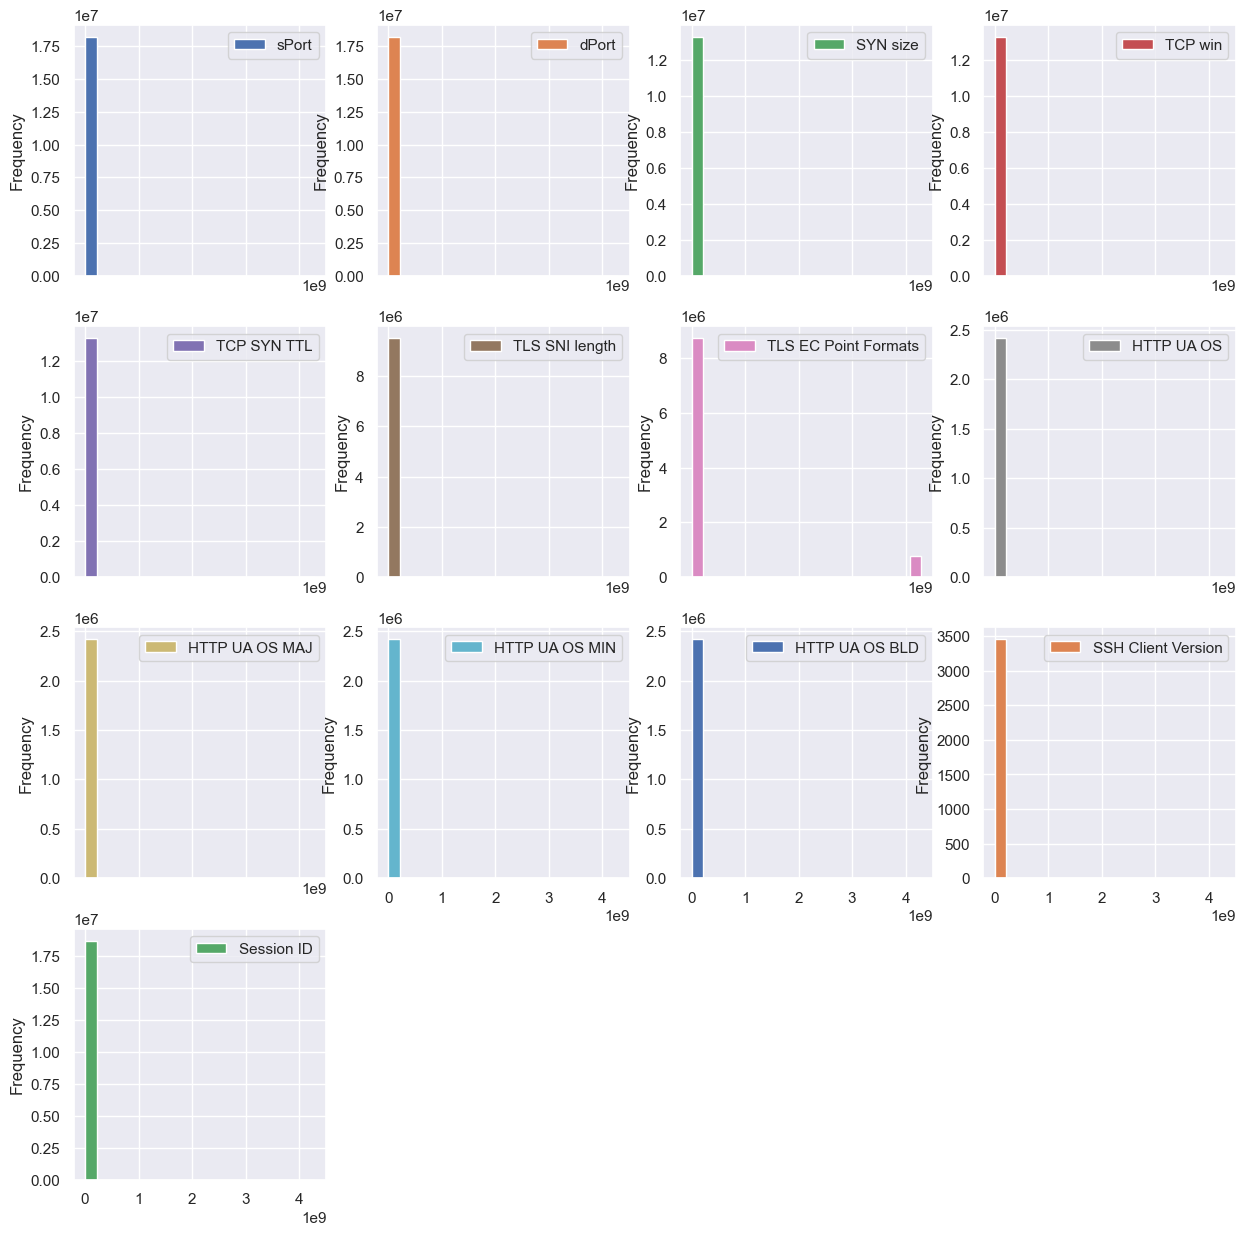

In [20]:
df.plot.hist(subplots=True, layout=(4, 4), figsize=(15, 15), bins=20)

#### Histogram

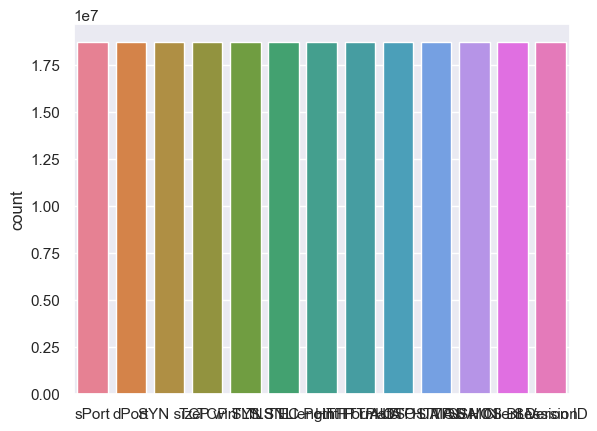

In [21]:
plt.xticks(rotation=0)
sns.countplot(data=df)
plt.show()

In [22]:
# CATEGORICAL_FEATURES = [
#     "TLS Client Version", "Client Cipher Suites", 
#     "TLS Extension Types", "TLS Extension Lengths",
#     "TLS Elliptic Curves", "TLS EC Point Formats" 
# ]

# for feature in CATEGORICAL_FEATURES:
#     plt.xticks(rotation=0)
#     sns.countplot(y=feature, data=df)
#     plt.show()

In [23]:
# df_hist = df['HTTP_Host_OS'] + " " + df['HTTP_Host_OS_Major_Version'].astype(str)
# top_10_values = df_hist.value_counts().head(15)
# df_hist = df_hist[df_hist.isin(top_10_values.index)]
# sns.countplot(data=df_hist)

In [24]:
# df_hist = df['HTTP_Host_OS'] + " " + df['HTTP_Host_OS_Major_Version'].astype(str) + " " + df['HTTP_Host_OS_Minor_Version'].astype(str)
# top_10_values = df_hist.value_counts().head(15)
# df_hist = df_hist[df_hist.isin(top_10_values.index)]
# sns.countplot(data=df_hist)

#### Correlation Heatmaps

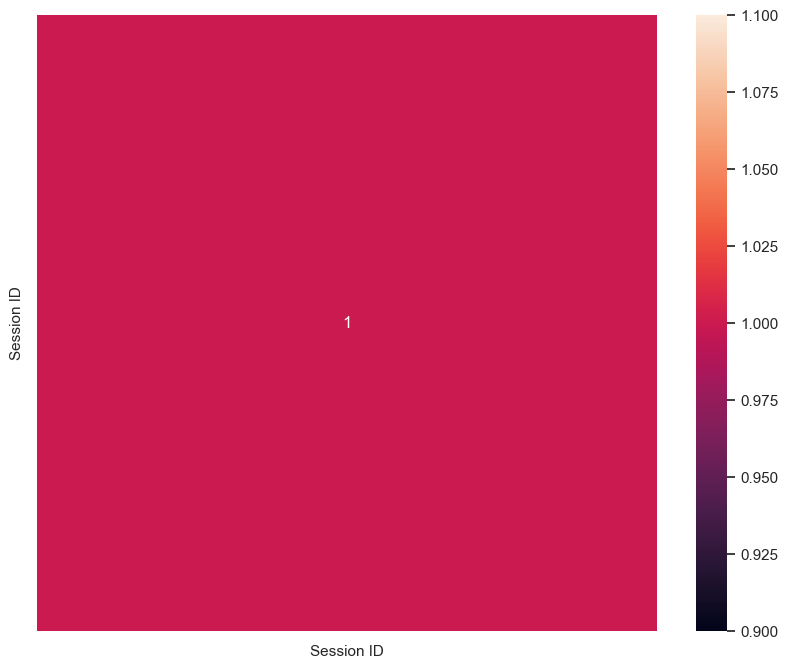

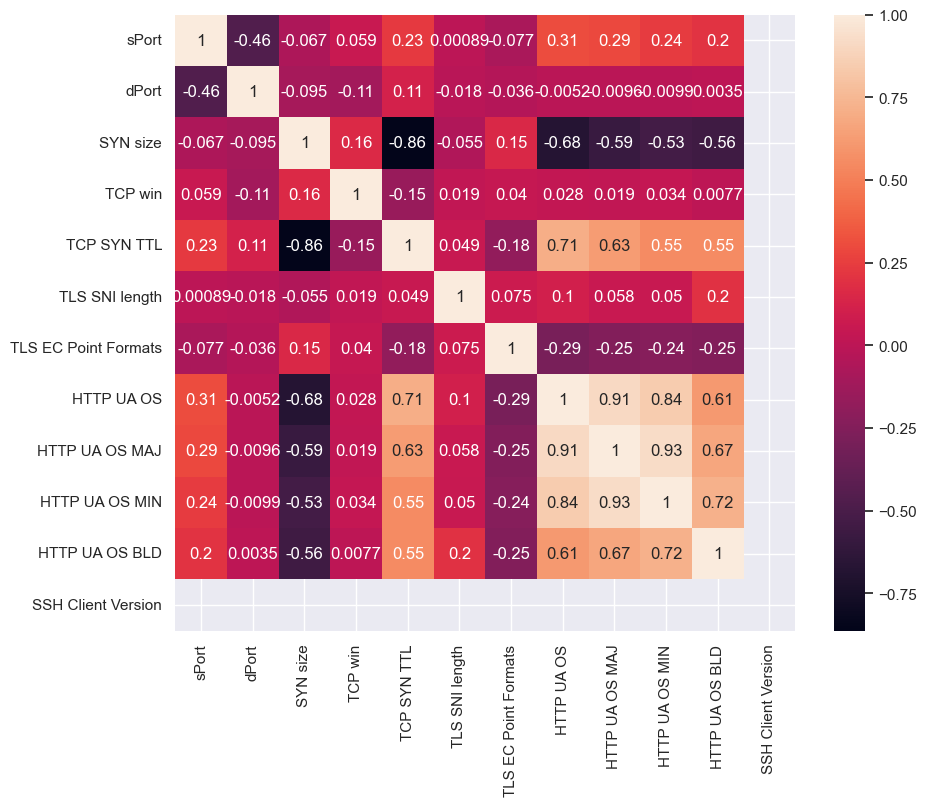

In [25]:
for dtype, columns in column_names_by_dtype.items():
    if dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 8))
        sns.heatmap(df[columns].corr(), annot=True)
        plt.show()

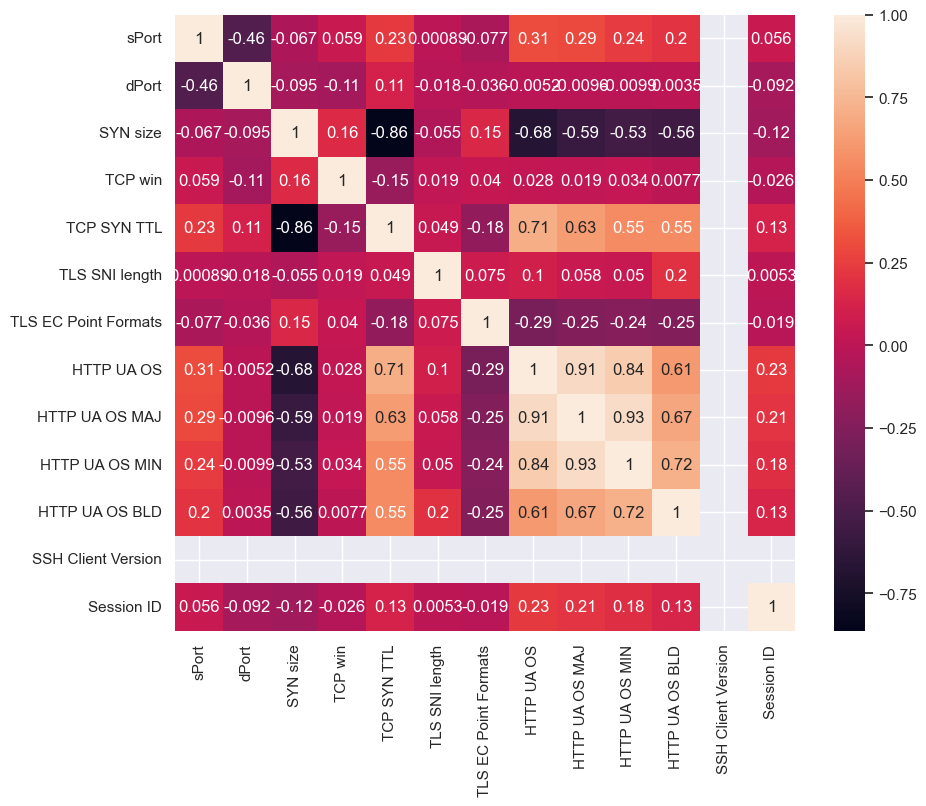

In [31]:
plt.figure(figsize=(10, 8))
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numerical_features].corr()
sns.heatmap(correlation, annot=True)
plt.show()

array([[<Axes: title={'center': 'HTTP UA OS'}, xlabel='[Ground Truth OS]'>,
        <Axes: title={'center': 'HTTP UA OS BLD'}, xlabel='[Ground Truth OS]'>,
        <Axes: title={'center': 'HTTP UA OS MAJ'}, xlabel='[Ground Truth OS]'>,
        <Axes: title={'center': 'HTTP UA OS MIN'}, xlabel='[Ground Truth OS]'>],
       [<Axes: title={'center': 'SSH Client Version'}, xlabel='[Ground Truth OS]'>,
        <Axes: title={'center': 'SYN size'}, xlabel='[Ground Truth OS]'>,
        <Axes: title={'center': 'Session ID'}, xlabel='[Ground Truth OS]'>,
        <Axes: title={'center': 'TCP SYN TTL'}, xlabel='[Ground Truth OS]'>],
       [<Axes: title={'center': 'TCP win'}, xlabel='[Ground Truth OS]'>,
        <Axes: title={'center': 'TLS EC Point Formats'}, xlabel='[Ground Truth OS]'>,
        <Axes: title={'center': 'TLS SNI length'}, xlabel='[Ground Truth OS]'>,
        <Axes: title={'center': 'dPort'}, xlabel='[Ground Truth OS]'>],
       [<Axes: title={'center': 'sPort'}, xlabel='[Ground Tr

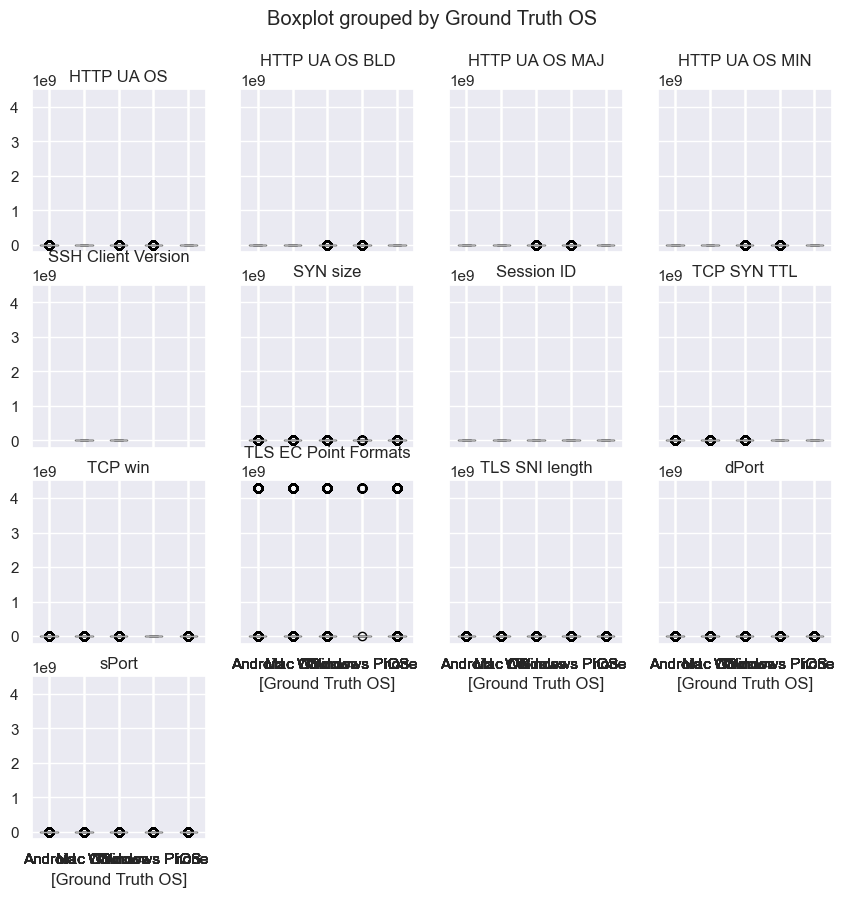

In [28]:
df.boxplot(by=target,figsize=(10,10))

In [ ]:
# Plot the figure
df.plot(kind='box', logy=True)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the figure
plt.show()

In [ ]:
df.hist(edgecolor='black', figsize=(12, 12))

In [ ]:
df.hist(bins=100, figsize=(12, 12))

In [ ]:
df_toplot=df.drop(targets,axis=1)
scatter_matrix(df_toplot,figsize=(10,10))
plt.show()

In [ ]:
sns.pairplot(df, hue=target)

### Preprocessing

#### Removing NaN

In [ ]:
my_show_df_NaNs(df)

In [ ]:
df.dropna(subset=target, inplace=True)

In [ ]:
my_show_df_NaNs(df)

In [ ]:
df['HTTP_Host_OS_Major_Version'] = df['HTTP_Host_OS_Major_Version'].fillna(0)

In [ ]:
my_show_df_NaNs(df)

#### Removing Features

In [ ]:
df.drop(['HTTP_Host_OS_Minor_Version', 'HTTP_hostname'], axis=1, inplace=True)

In [ ]:
my_show_df_NaNs(df)

In [ ]:
df['OS_target'] = df['HTTP_Host_OS'] + " " + df['HTTP_Host_OS_Major_Version'].astype(str)

In [ ]:
my_show_df_shape(df)

In [ ]:
for column in ['OS_target', 'HTTP_Host_OS', 'HTTP_Host_OS_Major_Version']:
    plt.xticks(rotation=0)
    top = 15
    top_values = df[column].value_counts().head(top)
    sns.countplot(y=column, data=df[df[column].isin(top_values.index)])
    plt.show()

In [ ]:
df

### Split